In [2]:
import pandas as pd

filePath = "./Dataset/MusicInfo.csv"
df = pd.read_csv(filePath)

df.head()


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


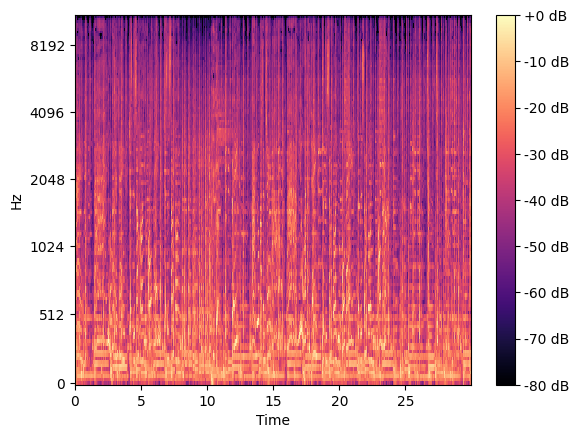

In [37]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# To generate one Spectrogram

filename = './Dataset/MP3-Example/Blues/Blues-TRACOHF128F1498509.mp3'  # Replace with your MP3 file path
y, sr = librosa.load(filename)
song, _ = librosa.effects.trim(y)
hop_length = 512
n_fft = 2048
n_mels = 128

S = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [30]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define the source and destination directories
source_dir = './Dataset/MP3-Example'  
destination_dir = './OutputSpectrograms/'  

# Function to create Mel spectrogram from an MP3 file
def create_mel_spectrogram(mp3_path, output_path):
    # Load the MP3 file
    y, sr = librosa.load(mp3_path)
    song, _ = librosa.effects.trim(y)
    hop_length = 512
    n_fft = 2048
    n_mels = 128

    S = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot the Mel spectrogram without axes, scales, and title
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off') 
    plt.tight_layout()

    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()  

# Walk through the source directory
for subdir, _, files in os.walk(source_dir):
    # Create the corresponding directory in the destination
    relative_path = os.path.relpath(subdir, source_dir)
    dest_subdir = os.path.join(destination_dir, relative_path)
    os.makedirs(dest_subdir, exist_ok=True)

    for file in files:
        if file.endswith('.mp3'):
            mp3_path = os.path.join(subdir, file)
            spectrogram_path = os.path.join(dest_subdir, file.replace('.mp3', '.png'))
            create_mel_spectrogram(mp3_path, spectrogram_path)

print("Mel spectrogram conversion completed!")


Mel spectrogram conversion completed!


In [7]:
import pandas as pd

# Load both CSV files into DataFrames
csv1 = pd.read_csv('./GeneratedData/combined_data.csv')  # Replace with the path to your first CSV
csv2 = pd.read_csv('./Dataset/MusicInfo.csv')  # Replace with the path to your second CSV

# Merge the DataFrames on the 'track_id' column
merged_csv = pd.merge(csv1, csv2, on='track_id', how='inner')

# Drop the specified columns from the merged DataFrame
merged_csv = merged_csv.drop(labels=['artist', 'spotify_preview_url', 'spotify_id', 'year', 'danceability'], axis=1)

# Save the merged DataFrame to a new CSV file
merged_csv.to_csv('./GeneratedData/combined_data_with_musicInfo.csv', index=False)

print("CSV files merged successfully!")


CSV files merged successfully!


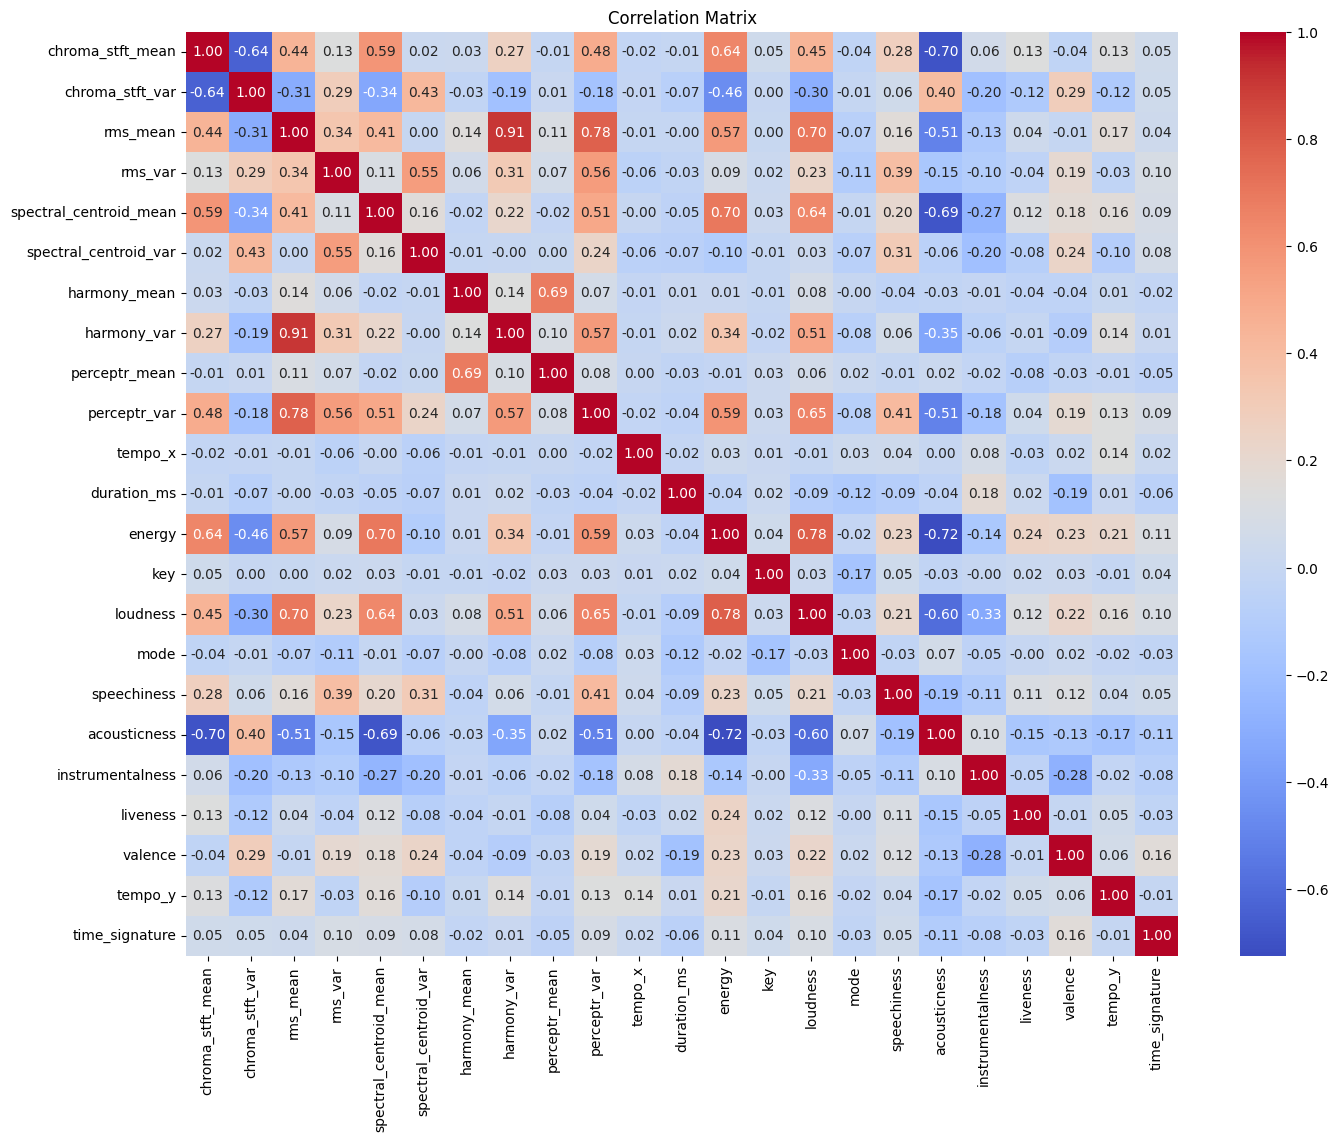

In [7]:
# Make correlation matrices

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('./GeneratedData/combined_data_with_musicInfo.csv')

# Select the columns to include in the correlation matrix
columns_to_include = [
    'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
    'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 
    'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo_x', 
    'duration_ms', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo_y', 
    'time_signature'
]

# Compute the correlation matrix
correlation_matrix = data[columns_to_include].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Columns retained: ['track_id', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_x', 'name', 'tags', 'genre', 'duration_ms', 'energy', 'key', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_y', 'time_signature']
Columns dropped: ['perceptr_var', 'loudness', 'acousticness', 'harmony_var']


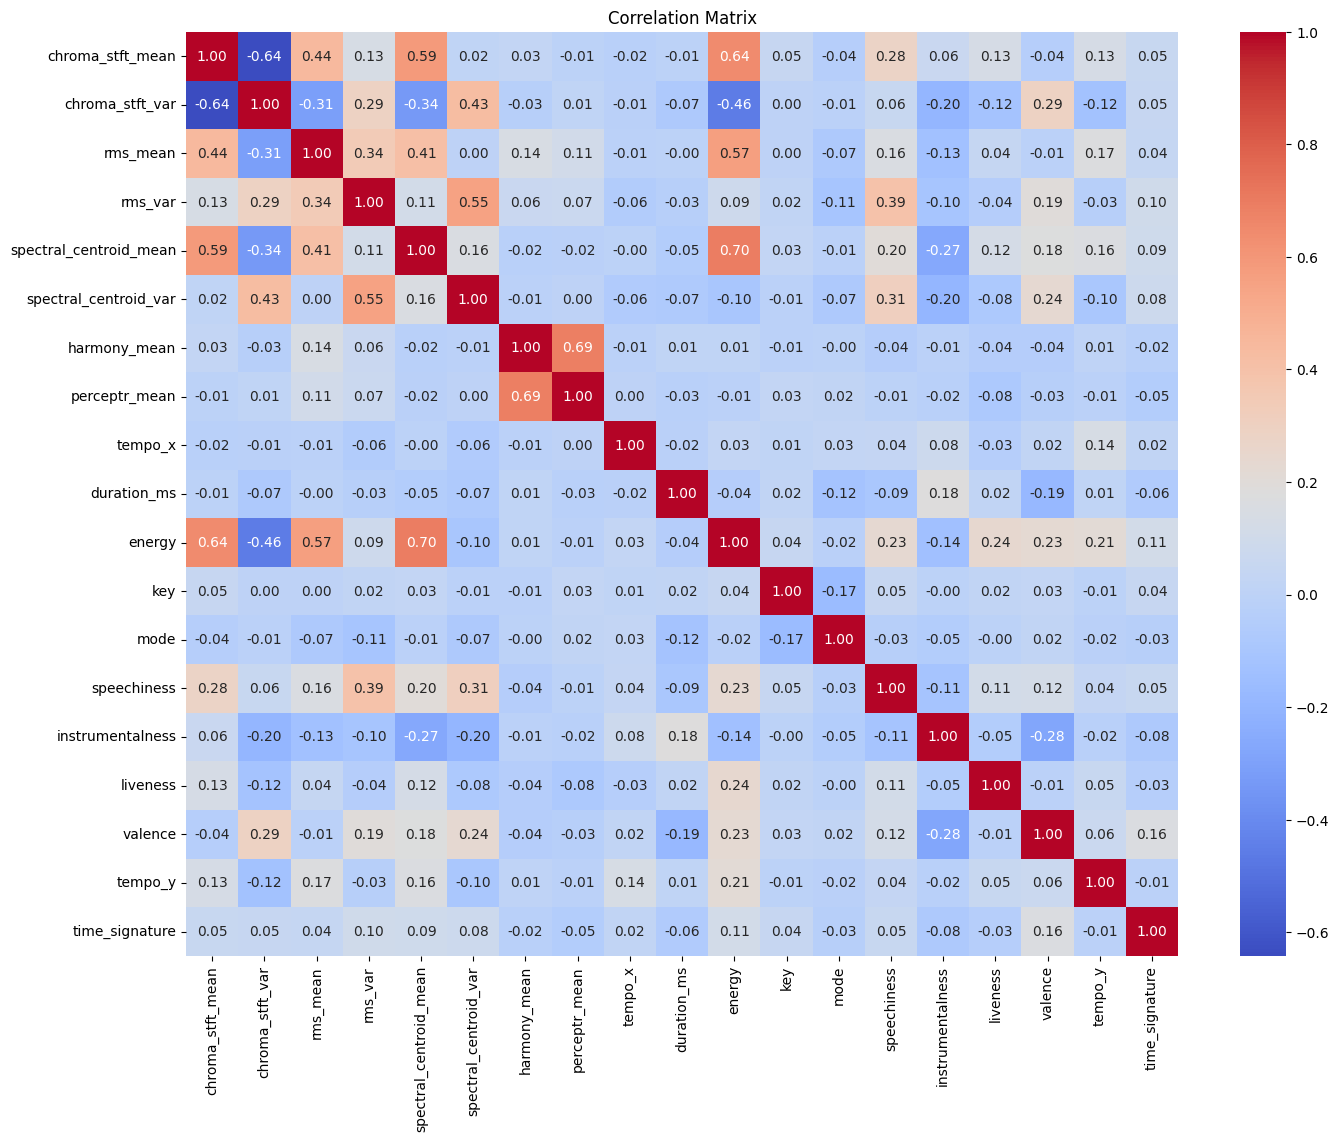

In [8]:
# Drop columns

correlation_matrix = data[columns_to_include].corr().abs()

columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        # Check if the correlation is above the threshold
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = correlation_matrix.columns[j]
            columns_to_drop.add(colname)

data_reduced = data.drop(columns=columns_to_drop)

print("Columns retained:", data_reduced.columns.tolist())
print("Columns dropped:", list(columns_to_drop))

cols_retained =['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'perceptr_mean', 'tempo_x', 'duration_ms', 'energy', 'key', 'mode', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo_y', 'time_signature']

new_correlation_matrix = data_reduced[cols_retained].corr()
# Plot the correlation matrix using seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

data_reduced.to_csv("GeneratedData/reducedData.csv", index=False)